In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from utils import *
from filters import LKF_CV
from measurement import MeasCartesianPos
from simulation import MotionSimulator, simulate_measurements_cartesian, simulate_measurements_polar
from scenarios import get_scenario

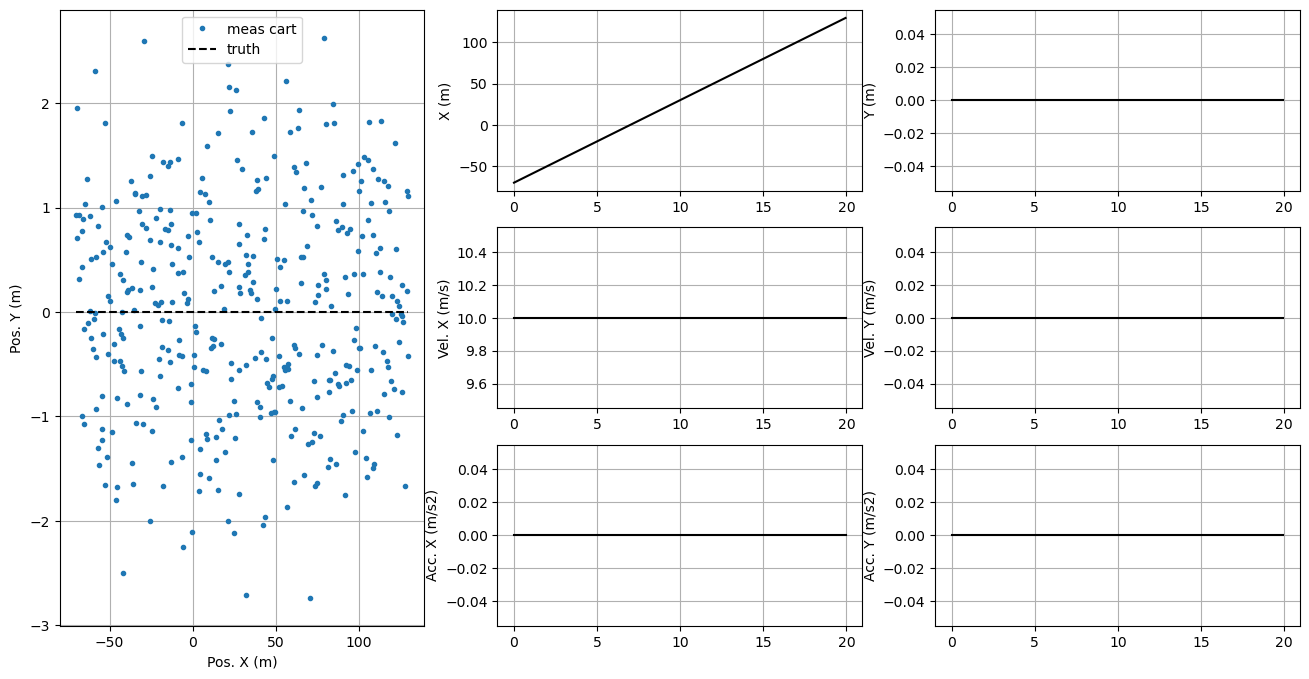

: 

In [8]:
SEED = 10
np.random.seed(SEED)
T = 0.05 # time between cycles
dim_state = 4 # dimension of state
n_iter = 50
# q_motion = [0.01**2/T, 0.01**2/T]
q_motion = [0**2/T, 0**2/T]
std_x, std_y = 1.0, 1.0
filters = [
    {
        'kf': LKF_CV, 'meas_fn': MeasCartesianPos(std_x, std_y), 'label': 'linear pos q=0.05', 
        'kf_params': {'qvar_ax': 0.01**2/T, 'qvar_ay': 0.01**2/T}
    },
]
n_filters = len(filters)

# get scenario
sc_id = '2'
sc = get_scenario(sc_id, T)
n_frames = int(sc['n_frames'])
frame_vec = np.arange(n_frames)

# simulating truth motion
sim_ca = MotionSimulator(T, motion_type='CA', q_vec=q_motion)
sim_state = sim_ca.simulate(n_frames, sc['x_init'], maneuver_x_frames=sc.get('manx_frames'), maneuver_y_frames=sc.get('many_frames', None))

meas_cart = simulate_measurements_cartesian(sim_state, std_x, std_y, 1)

# scenario viewer
plot_options = [
    {'grid_pos': (0, 1), 'index': IX, 'ylabel': 'X (m)'},
    {'grid_pos': (0, 2), 'index': IY, 'ylabel': 'Y (m)'},
    {'grid_pos': (1, 1), 'index': IVX, 'ylabel': 'Vel. X (m/s)'},
    {'grid_pos': (1, 2), 'index': IVY, 'ylabel': 'Vel. Y (m/s)'},
    {'grid_pos': (2, 1), 'index': IAX, 'ylabel': 'Acc. X (m/s2)'},
    {'grid_pos': (2, 2), 'index': IAY, 'ylabel': 'Acc. Y (m/s2)'},
]
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 3)
# X-Y plot
ax1 = fig.add_subplot(gs[:, 0])
ax1.plot(meas_cart[IMX, :], meas_cart[IMY], '.', label='meas cart')
ax1.plot(sim_state[IX, :], sim_state[IY, :], 'k--', label='truth')
ax1.legend()
ax1.grid()
ax1.set_xlabel('Pos. X (m)')
ax1.set_ylabel('Pos. Y (m)')
for p in plot_options:
    ax = fig.add_subplot(gs[*p['grid_pos']])
    ax.plot(frame_vec*T, sim_state[p['index'], :], 'k-', label='truth')
    ax.set_ylabel(p['ylabel'])
    ax.grid()